In [ ]:
import pandas as pd
http = pd.read_csv('/content/version_4_full.csv')


In [ ]:
http.head()

,Method,Path,Body,Single Quotes,Double Quotes,Dashes,Braces,Spaces,Tags,Colons,Backtick,Bad Words,XSS Check,XSS Word,Cmdi Word,Cmdi Check,Class
0,GET,/,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good
1,GET,/favicon.ico,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good
2,GET,/index.jsp?content=personal_savings.htm,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good
3,GET,/index.jsp?content=personal_deposit.htm,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good
4,GET,/index.jsp?content=personal_checking.htm,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.1 MB/s eta 0:0

In [ ]:
from pycaret.classification import *

# Assuming http is your pandas DataFrame containing the dataset
classification_setup = setup(data=http,
                              target='Class',  # 'class' is the target variable
                              normalize=True,
                              numeric_features=['Single Quotes', 'Double Quotes', 'Dashes', 'Braces', 'Spaces','Tags','Colons','Backtick', 'Bad Words','XSS Check','XSS Word','Cmdi Word','Cmdi Check'],
                              ignore_features=['Method', 'Path', 'Body'])

# Compare classification models
compare_models()


,Description,Value
0,Session id,2951
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"Sqli: 0, XSS: 1, cmdi: 2, good: 3"
4,Original data shape,"(2453, 17)"
5,Transformed data shape,"(2453, 14)"
6,Transformed train set shape,"(1717, 14)"
7,Transformed test set shape,"(736, 14)"
8,Ignore features,3
9,Numeric features,13


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9884,0.9993,0.9884,0.9885,0.9884,0.9842,0.9843,0.4490
gbc,Gradient Boosting Classifier,0.9878,0.9993,0.9878,0.9882,0.9878,0.9834,0.9836,1.2650
xgboost,Extreme Gradient Boosting,0.9872,0.9996,0.9872,0.9874,0.9872,0.9826,0.9827,0.1360
rf,Random Forest Classifier,0.9860,0.9992,0.9860,0.9863,0.9860,0.9810,0.9811,0.3310
et,Extra Trees Classifier,0.9854,0.9976,0.9854,0.9857,0.9854,0.9802,0.9803,0.2200
dt,Decision Tree Classifier,0.9837,0.9940,0.9837,0.9840,0.9837,0.9779,0.9780,0.0770
knn,K Neighbors Classifier,0.9691,0.9949,0.9691,0.9707,0.9693,0.9582,0.9586,0.0740
lr,Logistic Regression,0.9651,0.9947,0.9651,0.9655,0.9648,0.9524,0.9528,0.5870
svm,SVM - Linear Kernel,0.9557,0.0000,0.9557,0.9569,0.9557,0.9399,0.9403,0.0910
lda,Linear Discriminant Analysis,0.9126,0.9908,0.9126,0.9190,0.9117,0.8804,0.8830,0.0420


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2951, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgbm_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9942,0.9979,0.9942,0.9943,0.9942,0.9921,0.9921
1,0.9826,0.9992,0.9826,0.9828,0.9826,0.9763,0.9764
2,0.9884,0.9999,0.9884,0.9890,0.9884,0.9842,0.9844
3,0.9942,1.0000,0.9942,0.9943,0.9942,0.9921,0.9922
4,0.9826,0.9987,0.9826,0.9828,0.9825,0.9763,0.9764
5,0.9767,0.9994,0.9767,0.9767,0.9767,0.9685,0.9685
6,0.9942,0.9995,0.9942,0.9943,0.9942,0.9921,0.9922
7,0.9942,0.9990,0.9942,0.9943,0.9942,0.9921,0.9921
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

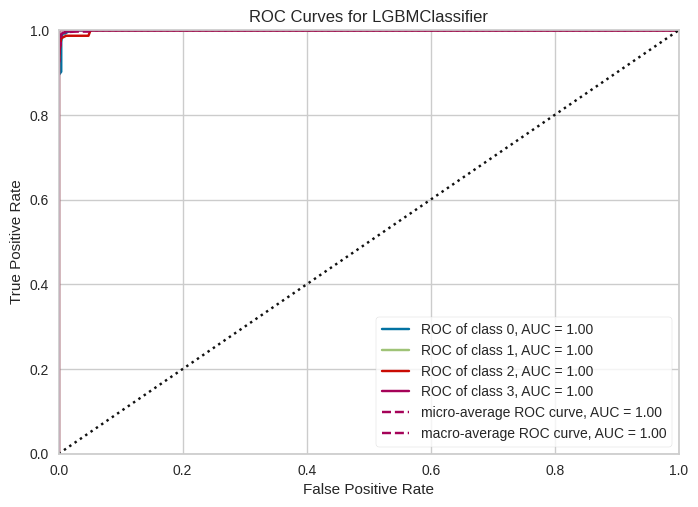

In [ ]:
plot_model(lgbm_model)

In [ ]:
test = pd.read_csv('/content/trial_v4.csv')
test.head()

,Method,Path,Body,Single Quotes,Double Quotes,Dashes,Braces,Spaces,Tags,Colons,Backtick,Bad Words,XSS Check,XSS Word,Cmdi Word,Cmdi Check
0,GET,/DVWA/,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GET,/dvwa/js/add_event_listeners.js,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GET,/DVWA/vulnerabilities/brute/,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
3,GET,/DVWA/vulnerabilities/exec/,NaN,0,0,0,0,0,0,0,0,0,0,0,1,6
4,GET,/DVWA/vulnerabilities/csrf/,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_result = predict_model(lgbm_model,data = test)


In [ ]:
test_result

,Method,Path,Body,Single Quotes,Double Quotes,Dashes,Braces,Spaces,Tags,Colons,Backtick,Bad Words,XSS Check,XSS Word,Cmdi Word,Cmdi Check,prediction_label,prediction_score
0,GET,/DVWA/,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good,1.0000
1,GET,/dvwa/js/add_event_listeners.js,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good,1.0000
2,GET,/DVWA/vulnerabilities/brute/,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good,1.0000
3,GET,/DVWA/vulnerabilities/exec/,NaN,0,0,0,0,0,0,0,0,0,0,0,1,6,cmdi,0.9989
4,GET,/DVWA/vulnerabilities/csrf/,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good,1.0000
5,GET,/DVWA/vulnerabilities/fi/?page=include.php,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good,1.0000
6,GET,/DVWA/vulnerabilities/upload/,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good,1.0000
7,GET,/DVWA/vulnerabilities/captcha/,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good,1.0000
8,GET,/DVWA/vulnerabilities/sqli/,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good,1.0000
9,GET,/DVWA/vulnerabilities/sqli_blind/,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,good,1.0000


In [ ]:
evaluate_model(lgbm_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
model1 = finalize_model(lgbm_model)

In [ ]:
save_model(model1,'model4_grindwall')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Single Quotes', 'Double Quotes',
                                              'Dashes', 'Braces', 'Spaces',
                                              'Tags', 'Colons', 'Backtick',
                                              'Bad Words', 'XSS Check',
                                              'XSS Word', 'Cmdi Word',
                                              'Cmdi Check'],...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                     

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 103.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 97.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 95.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 143.8 MB/s eta 0

In [ ]:
import re
import pandas as pd
from pycaret.classification import *
path = 'http://192.168.0.110/DVWA'
body = ''
method = 'GET'
bad_words = ['sleep', 'drop', 'uid', 'select', 'waitfor', 'delay', 'system', 'union', 'order by', 'delete', 'group by', 'insert', 'or']
single_quotes = path.count("'") + body.count("'")
double_quotes = path.count('"') + body.count('"')
dashes = path.count('--') + body.count('--')
braces = path.count('{') + path.count('}') + path.count('(') + body.count('{') + body.count('}') + body.count('(')
spaces = path.count(' ') + body.count(" ")
bad_words_count = sum(1 for word in bad_words if re.search(r'\b' + re.escape(word) + r'\b', path, re.IGNORECASE))
datas = [method,path,body,single_quotes,double_quotes,dashes,braces,spaces,bad_words_count]
input = pd.DataFrame([datas], columns=['Method','Path','Body','Single_q', 'Double_q', 'Dashes', 'Braces', 'Spaces', 'Bad_Words'])
print(input)

model = load_model()


  Method                       Path Body  Single_q  Double_q  Dashes  Braces  \
0    GET  http://192.168.0.110/DVWA              0         0       0       0   

   Spaces  Bad_Words  
0       0          0  


In [ ]:
import os
import xml.etree.ElementTree as ET
import csv
import argparse
import base64
import re
from urllib import parse
# Define a list of SQL keywords to check against
bad_words = ['sleep', 'drop', 'uid', 'select', 'waitfor', 'delay', 'system', 'union', 'order by', 'delete', 'group by', 'insert', 'id']
xss = ['script','img','a','javascript','svg']
def analyze_request_content(path,body):

    path = parse.unquote(path)
    single_quotes = path.count("'") + body.count("'")
    double_quotes = path.count('"') + body.count('"')
    dashes = path.count('--') + body.count('--')
    braces = path.count('{') + path.count('}') + path.count('(') + body.count('{') + body.count('}') + body.count('(')
    spaces = path.count(' ') + body.count(" ")
    tags = path.count('<') + path.count('>')+ body.count('<')+body.count('>')
    colons = path.count(';')+body.count(';')
    bad_words_count1 = sum(1 for word in bad_words if re.search(r'\b' + re.escape(word) + r'\b', path, re.IGNORECASE))
    bad_words_count2 = sum(1 for word in bad_words if re.search(r'\b' + re.escape(word) + r'\b', body, re.IGNORECASE))
    xss_count1 = sum(1 for word in xss if re.search(r'\b' + re.escape(word) + r'\b', path, re.IGNORECASE))
    xss_count2 = sum(1 for word in xss if re.search(r'\b' + re.escape(word) + r'\b', body, re.IGNORECASE))
    bad_words_count = bad_words_count1+ bad_words_count2
    xss_count = xss_count1+xss_count2

    return single_quotes, double_quotes, dashes, braces, spaces,tags,colons, bad_words_count,xss_count

def parse_xml_to_csv(xml_file_path, csv_file_path):
    # Create a CSV file and write header
    csv_header = ['Method', 'Path', 'Body', 'Single Quotes', 'Double Quotes', 'Dashes', 'Braces', 'Spaces','Tags','Colons', 'Bad Words','XSS']

    with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(csv_header)

        # Parse the XML file
        tree = ET.parse(xml_file_path)
        root = tree.getroot()

        # Loop through each <item> element
        for item in root.findall('./item'):
            method = item.find('./method').text
            path = item.find('./path').text
            request_enc = item.find('./request').text.strip()
            request_content = base64.b64decode(request_enc).decode('utf-8')

            if method == "POST":
                try:
                    body_start = request_content.index('\r\n\r\n') + 4
                    body = request_content[body_start:]
                except ValueError:
                    body = ""
            else:
                body = ""

            # Analyze the request content
            single_quotes, double_quotes, dashes, braces, spaces,tags,colons, bad_words_count,xss_count = analyze_request_content(path,body)

            # Write data to CSV file
            csv_writer.writerow([method, path, body, single_quotes, double_quotes, dashes, braces, spaces,tags,colons, bad_words_count,xss_count])

    print("CSV file created:", csv_file_path)

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Parse XML log file and create CSV dataset.")
    parser.add_argument("--x", required=True, help="Path to the XML log file")
    parser.add_argument("--c", default=None, help="Path to the output CSV file")

    args = parser.parse_args()

    if args.c is None:
        # Determine the CSV filename based on the XML filename
        xml_filename = os.path.basename(args.x)
        csv_filename = xml_filename.replace('.xml', '.csv')

        # Construct the full path to the CSV file
        args.c = os.path.join("csvFiles", csv_filename)

    parse_xml_to_csv(args.x, args.c)
